In [2]:
#! pip install -r requirements.txt

# Importando librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importando datos

In [4]:
'''
Cuando comencé a trabajar con el archivo 'dataset_SCL.csv' proporcionado y evidencié que
algunas lineas contenían el caracter ", sencillo o triple. Esto crea un error en esas lineas
al ser leido como pandas.DataFrame. Por ejemplo, las lineas 17.059 y 17.060 vienen con ese
problema.

Decidí elimnar esas lineas, en la lectura de los datos usando, el comment='"'.
El archivo original tiene 68.206 y quedó con 68.167.
Se eliminaron solamente 39 lineas, un tamaño infimo de datos para el tamaño original.

Usé dtype='object' porque siendo un desafio de clasificación, y dando una ojeada inicial 
a los datos, establezco que son pocos los tipos de datos diferentes a object.

Serian datetime solamente 'Fecha-I' y 'Fecha-O'.
Serian solamente int 'DIA', 'MES' y 'AÑO'
'''

df_initial = pd.read_csv('dataset_SCL.csv', dtype='object', comment='"', encoding='utf-8')
df_initial.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
# Comprobando que todas las columnas quedaron tipo object
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68167 non-null  object
 1   Vlo-I      68167 non-null  object
 2   Ori-I      68167 non-null  object
 3   Des-I      68167 non-null  object
 4   Emp-I      68167 non-null  object
 5   Fecha-O    68167 non-null  object
 6   Vlo-O      68166 non-null  object
 7   Ori-O      68167 non-null  object
 8   Des-O      68167 non-null  object
 9   Emp-O      68167 non-null  object
 10  DIA        68167 non-null  object
 11  MES        68167 non-null  object
 12  AÑO        68167 non-null  object
 13  DIANOM     68167 non-null  object
 14  TIPOVUELO  68167 non-null  object
 15  OPERA      68167 non-null  object
 16  SIGLAORI   68167 non-null  object
 17  SIGLADES   68167 non-null  object
dtypes: object(18)
memory usage: 9.4+ MB


# Preparación y limpieza de los datos

## Arreglando problemas de tipo de datos

### Fechas

In [6]:
# Transformando 'fechas' a datetime
df_initial['Fecha-I'] =  pd.to_datetime(df_initial['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df_initial['Fecha-O'] =  pd.to_datetime(df_initial['Fecha-O'], format='%Y-%m-%d %H:%M:%S')
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68167 non-null  datetime64[ns]
 1   Vlo-I      68167 non-null  object        
 2   Ori-I      68167 non-null  object        
 3   Des-I      68167 non-null  object        
 4   Emp-I      68167 non-null  object        
 5   Fecha-O    68167 non-null  datetime64[ns]
 6   Vlo-O      68166 non-null  object        
 7   Ori-O      68167 non-null  object        
 8   Des-O      68167 non-null  object        
 9   Emp-O      68167 non-null  object        
 10  DIA        68167 non-null  object        
 11  MES        68167 non-null  object        
 12  AÑO        68167 non-null  object        
 13  DIANOM     68167 non-null  object        
 14  TIPOVUELO  68167 non-null  object        
 15  OPERA      68167 non-null  object        
 16  SIGLAORI   68167 non-null  object       

### Enteros

In [7]:
# Transformando 'DIA', 'MES' y 'AÑO', para tipo int
df_initial = df_initial.astype({'DIA': 'int32', 'MES': 'int32', 'AÑO': 'int32'})
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68167 non-null  datetime64[ns]
 1   Vlo-I      68167 non-null  object        
 2   Ori-I      68167 non-null  object        
 3   Des-I      68167 non-null  object        
 4   Emp-I      68167 non-null  object        
 5   Fecha-O    68167 non-null  datetime64[ns]
 6   Vlo-O      68166 non-null  object        
 7   Ori-O      68167 non-null  object        
 8   Des-O      68167 non-null  object        
 9   Emp-O      68167 non-null  object        
 10  DIA        68167 non-null  int32         
 11  MES        68167 non-null  int32         
 12  AÑO        68167 non-null  int32         
 13  DIANOM     68167 non-null  object        
 14  TIPOVUELO  68167 non-null  object        
 15  OPERA      68167 non-null  object        
 16  SIGLAORI   68167 non-null  object       

## Valores nulos

In [8]:
# Valores nulos?
df_initial.isnull().sum().sum()

1

In [9]:
# Fila del valor nulo?
row_nan = df_initial[df_initial.isnull().any(1)]
row_nan 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


El valor nan está en la columna 'Vlo-O'.

In [10]:
# Colocaré el mismo valor de 'Vlo-I'
df_initial.loc[6068,'Vlo-O']='200'

In [11]:
# Rectificando valores nulos?
df_initial.isnull().sum().sum()

# No hay valores nulos

0

## Datos duplicados

In [12]:
# Existen datos duplicados?
df_initial.duplicated().any()

# No hay valores duplicados

False

## Concordancia de la información

### Cantidad de valores unicos

La información contenida tiene concordar con lo que significa.

Por ejemplo, encontrar una ciudad en tipo de vuelo, seria un problema de concordancia.

In [13]:
# Para esto calculó la cantidad de datos unicos por columna
df_initial.nunique()

Fecha-I      53232
Vlo-I          581
Ori-I            1
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          857
Ori-O            1
Des-O           60
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        59
dtype: int64

Tres columnas tienen valores unicos y se pueden eliminar.

Estas tres columnas se refieren al origen de los vuelos.

Todos los vuelos se originan desde Santiago.

In [14]:
df_initial.drop(['Ori-I', 'Ori-O', 'SIGLAORI'], axis=1, inplace=True)

### AÑO

Hay dos valores en 'AÑO', pero parece que las 'fechas' son solo de 2017

In [15]:
# Comprobar los años de las fechas
df_initial['AÑO'].value_counts()

2017    68165
2018        2
Name: AÑO, dtype: int64

Hay solo dos fechas con 'AÑO' de 2018

In [16]:
# Se puede comprobar manualmente
row_2018 = df_initial[df_initial['AÑO'] == 2018]
row_2018 

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
66891,2017-12-31 23:55:00,602,KLAX,LAN,2018-01-01 00:02:00,602.0,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Los Angeles
66920,2017-12-31 23:40:00,622,MMMX,LAN,2018-01-01 00:12:00,622.0,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Ciudad de Mexico


Realmente corresponde a dos vuelos que operaron en 2018. Pero, por la poca variabilidad de los datos de 'AÑO', esta columna se puede elimnar

In [17]:
df_initial.drop(['AÑO'], axis=1, inplace=True)

### Concordancia de fechas

In [18]:
# 'DIA' está bien
df_initial['DIA'].unique()

array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20],
      dtype=int32)

In [19]:
# 'MES' está bien
df_initial['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [20]:
# 'DIANOM' está bien
df_initial['DIANOM'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

### Codigo aerolinea

Se presumió, inicialmente, que 'Emp-I', 'Emp-O' y 'OPERA' se refirieran a la misma aerolinea, pero el numero de valores unicos parece indicar lo contrario.

In [21]:
# ¿En cuántas filas son diferentes?
df_initial[df_initial['Emp-I'] != df_initial['Emp-O']]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
345,2017-01-21 22:30:00,2291,SABE,AUT,2017-01-21 22:28:00,2291,SABE,ARG,21,1,Sabado,I,Austral,Buenos Aires
814,2017-01-01 07:14:00,624,SPJC,AVA,2017-01-01 07:11:00,624,SPJC,LRC,1,1,Domingo,I,Avianca,Lima
815,2017-01-02 07:00:00,624,SPJC,AVA,2017-01-02 07:05:00,624,SPJC,LRC,2,1,Lunes,I,Avianca,Lima
816,2017-01-03 07:14:00,624,SPJC,AVA,2017-01-03 07:14:00,624,SPJC,LRC,3,1,Martes,I,Avianca,Lima
817,2017-01-04 07:00:00,624,SPJC,AVA,2017-01-04 07:24:00,624,SPJC,LRC,4,1,Miercoles,I,Avianca,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,2017-12-26 16:30:00,1033,SCIE,LAW,2017-12-26 16:34:00,1033.0,SCIE,JMR,26,12,Martes,N,Latin American Wings,Concepcion
67839,2017-12-27 16:30:00,1033,SCIE,LAW,2017-12-27 16:30:00,1033.0,SCIE,JMR,27,12,Miercoles,N,Latin American Wings,Concepcion
67840,2017-12-28 16:30:00,1033,SCIE,LAW,2017-12-28 16:29:00,1033.0,SCIE,JMR,28,12,Jueves,N,Latin American Wings,Concepcion
67841,2017-12-29 16:30:00,1033,SCIE,LAW,2017-12-29 16:49:00,1033.0,SCIE,JMR,29,12,Viernes,N,Latin American Wings,Concepcion


En más de 18.000 vuelos la aerolinea programada fue diferente a la aerolinea que finalmente operó el vuelo. Si hay una relación directa entre estos vuelos y el retraso, esta podria ser **una variable muy importante** para los modelos.

**Voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de aerolinea y valores 0 donde no hubo ese cambio.**

### Codigo de vuelo

#### Codigos de vuelos con decimales

In [22]:
df_initial['Vlo-O'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

In [23]:
df_initial['Vlo-I'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

Se pudo observar que algunos valores de 'Vlo-O' tienen numeros almacenados con decimales (.0). Por esto 'Vlo-O' tiene 857 valores unicos y 'Vlo-I' tiene solo 581 valores unicos

In [24]:
# Remplazar '.0' en 'Vlo-O'
df_initial['Vlo-O'] = df_initial['Vlo-O'].str.replace('.0','')
df_initial.nunique()

Fecha-I      53232
Vlo-I          581
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          444
Des-O           60
Emp-O           32
DIA             31
MES             12
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLADES        59
dtype: int64

'Vlo-O' pasó de 857 valores unicos a 444

In [25]:
# Problemas de los decimales solucionado
df_initial['Vlo-O'].unique()

array(['226', '912', '9', '92', '93', '1', '11', '1281', '1283', '1285',
       '1287', '1289', '1291', '2291', '98', '116', '176', '2', '295',
       '689', '112', '118', '174', '249', '276', '495', '4495', '146',
       '7661', '7663', '9245', '9268', '9362', '68', '624', '28', '846',
       '741', '21', '23', '27', '29', '69', '73', '75', '99', '8125',
       '8137', '81', '8161', '91', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '3', '7', '13', '15', '17', '25', '41', '43', '51',
       '53', '55', '61', '71', '83', '4', '6', '8', '122', '128', '132',
       '134', '142', '156', '162', '164', '166', '172', '182', '184',
       '186', '188', '192', '194', '196', '521', '531', '551', '0', '14',
       '31', '35', '37', '57', '65', '67', '89', '97', '114', '124',
       '126', '136', '138', '144', '148', '152', '154', '168', '178',
       '211', '213', '215', '217', '219', '221', '231', '233', '235',
       '237', '239', '241', '247', '251', '257', '259', '261', '26

#### Cambio codigo de vuelo entre programado y operado

Similar al cambio de codigo de aerolinea entre los vuelos programados y operados. Existe un cambio ente el codigo de vuelo programado y operado.

In [26]:
# ¿En cuántas filas son diferentes el codigo de vuelo programado con el operado?
df_initial[df_initial['Vlo-I'] != df_initial['Vlo-O']]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
48,2017-01-01 22:30:00,940,KDFW,AAL,2017-01-01 22:31:00,9,KDFW,AAL,1,1,Domingo,I,American Airlines,Dallas
49,2017-01-02 22:30:00,940,KDFW,AAL,2017-01-02 22:26:00,9,KDFW,AAL,2,1,Lunes,I,American Airlines,Dallas
50,2017-01-03 22:30:00,940,KDFW,AAL,2017-01-03 22:40:00,9,KDFW,AAL,3,1,Martes,I,American Airlines,Dallas
51,2017-01-04 22:30:00,940,KDFW,AAL,2017-01-04 22:50:00,9,KDFW,AAL,4,1,Miercoles,I,American Airlines,Dallas
52,2017-01-05 22:30:00,940,KDFW,AAL,2017-01-05 22:41:00,9,KDFW,AAL,5,1,Jueves,I,American Airlines,Dallas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68162,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,0,SPJC,JAT,22,12,Viernes,I,JetSmart SPA,Lima
68163,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,0,SPJC,JAT,25,12,Lunes,I,JetSmart SPA,Lima
68164,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,0,SPJC,JAT,27,12,Miercoles,I,JetSmart SPA,Lima
68165,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,0,SPJC,JAT,29,12,Viernes,I,JetSmart SPA,Lima


En 19.721 vuelos hubo un cambio entre el codigo de vuelo programado con el codigo de vuelo operado. Acá podría hacer una relación directa cuando se presentan los retrasos y seria una **variable muy importante**.

**Igual que con el cambio de codigo de aerolinea, voy a definir más adelante una columna con valores 1 para los vuelos donde hubo cambio de codigo de vuelo y valores 0 donde no hubo ese cambio.**

### Ciudad destino

Se presumió, inicialmente, que 'Des-I', 'Des-O' y 'SIGLADES' se refirieran a la misma ciudad, pero el numero de valores unicos parece indicar lo contrario.

In [27]:
# ¿En cuáles filas es diferente?
df_initial[df_initial['Des-I'] != df_initial['Des-O']]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
1397,2017-01-17 19:20:00,25,SCTE,SKU,2017-01-17 19:46:00,25,SCQP,SKU,17,1,Martes,N,Sky Airline,Temuco
7290,2017-02-15 06:25:00,11,SCTE,SKU,2017-02-15 06:25:00,11,SCQP,SKU,15,2,Miercoles,N,Sky Airline,Temuco
7520,2017-02-27 06:40:00,71,SCIE,SKU,2017-02-27 09:07:00,71,SCQP,SKU,27,2,Lunes,N,Sky Airline,Temuco
8456,2017-02-15 06:10:00,57,SCTE,LAN,2017-02-15 06:12:00,57,SCQP,LAN,15,2,Miercoles,N,Grupo LATAM,Temuco
12787,2017-03-18 06:25:00,11,SCTE,SKU,2017-03-18 06:29:00,11,SCQP,SKU,18,3,Sabado,N,Sky Airline,Temuco
12823,2017-03-22 12:50:00,17,SCBA,SKU,2017-03-22 12:48:00,17,SCTE,SKU,22,3,Miercoles,N,Sky Airline,Puerto Montt
16169,2017-03-13 23:20:00,532,KJFK,LAN,2017-03-14 01:35:00,1346,KMIA,LAN,14,3,Martes,I,Grupo LATAM,Miami
16937,2017-03-22 17:00:00,1446,SEGU,LAN,2017-03-22 17:11:00,1361,SABE,LAN,22,3,Miercoles,I,Grupo LATAM,Buenos Aires
18291,2017-04-14 18:40:00,25,SCTE,SKU,2017-04-14 18:48:00,25,SCQP,SKU,14,4,Viernes,N,Sky Airline,Temuco
20442,2017-04-14 22:00:00,289,SCTE,LAN,2017-04-14 22:01:00,289,SCCI,LXP,14,4,Viernes,N,Grupo LATAM,Punta Arenas


Hay 28 vuelos en los que 'Des-I' es diferente de 'Des-O'.

Haciendo una busqueda rapida, parece ser que el codigo **OACI** de 'Des-I' está desactualizado, en algunos casos. En otros casos, hay ciudades que cuentan con mas de un aeropuerto y los vuelos fueron finalmente operados a aeropuertos distintos a los programados, pero en la misma ciudad.

De acuerdo a lo anterior, manejaré **solamente** 'SIGLADES' para los modelos.

#### Eliminar 'Des-I' y 'Des-O'

Pero, como 28 vuelos hacen una poco diferencia sobre los 68.167 vuelos en total. 

Decido no usar estas dos features, porque no tienen la sufiente variacion para aportar al objetivo.

In [28]:
df_initial.drop(['Des-I', 'Des-O'], axis=1, inplace=True)

# PUNTO 1

## ¿Cómo se distribuyen los datos?

In [29]:
# Definicion de variables para graficar
daymonth_flights = df_initial['DIA'].value_counts()
month_flights = df_initial['MES'].value_counts()
weekday_flights = df_initial['DIANOM'].value_counts()
days = [weekday_flights.index[2], weekday_flights.index[5],
        weekday_flights.index[4], weekday_flights.index[1],
        weekday_flights.index[0], weekday_flights.index[6],
        weekday_flights.index[3]
]
values_days = [weekday_flights.values[2], weekday_flights.values[5],
               weekday_flights.values[4], weekday_flights.values[1],
               weekday_flights.values[0], weekday_flights.values[6],
               weekday_flights.values[3]
]
type_flights = df_initial['TIPOVUELO'].value_counts()
airline_flights = df_initial['OPERA'].value_counts()
destination_flights = df_initial['SIGLADES'].value_counts()

### Distribución 'DIA'

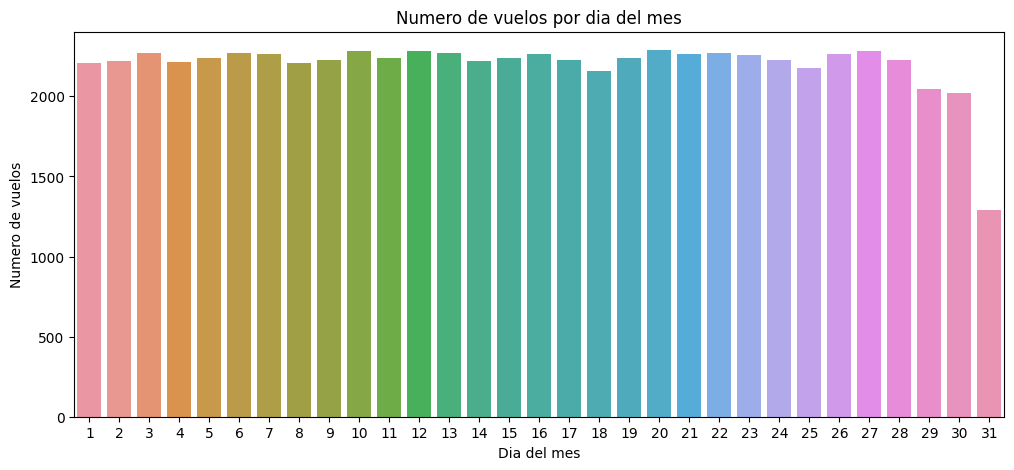

In [30]:
plt.figure(figsize = (12,5))
sns.barplot(x=daymonth_flights.index, y=daymonth_flights.values)
plt.title('Numero de vuelos por dia del mes')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Dia del mes', fontsize=10)
plt.xticks(rotation=0)
plt.show()

### Distribución 'MES'

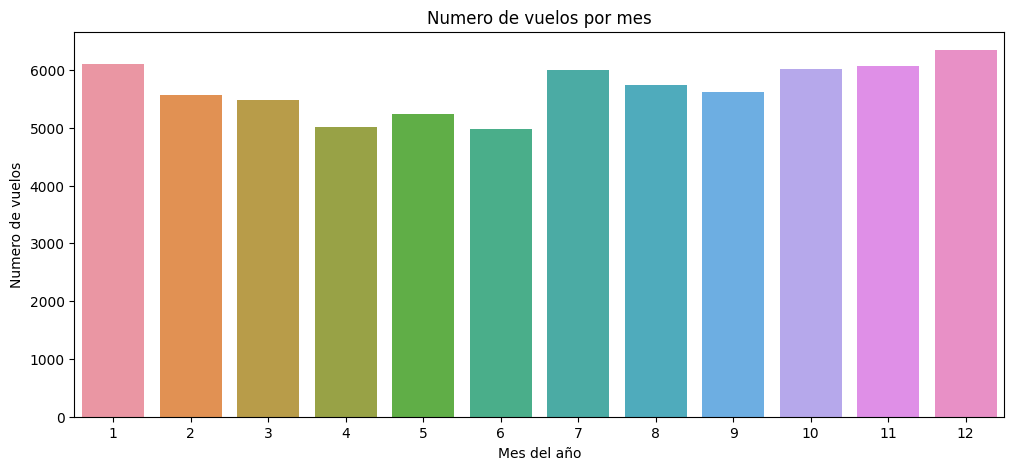

In [31]:
plt.figure(figsize = (12,5))
sns.barplot(x=month_flights.index, y=month_flights.values)
plt.title('Numero de vuelos por mes')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Mes del año', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [32]:
# Porcentaje de disminución de vuelos en junio (6), con relación al mes con más vuelos.
(month_flights[12]-month_flights[6])/month_flights[12]

0.2148486759142497

### Distribución 'DIANOM'

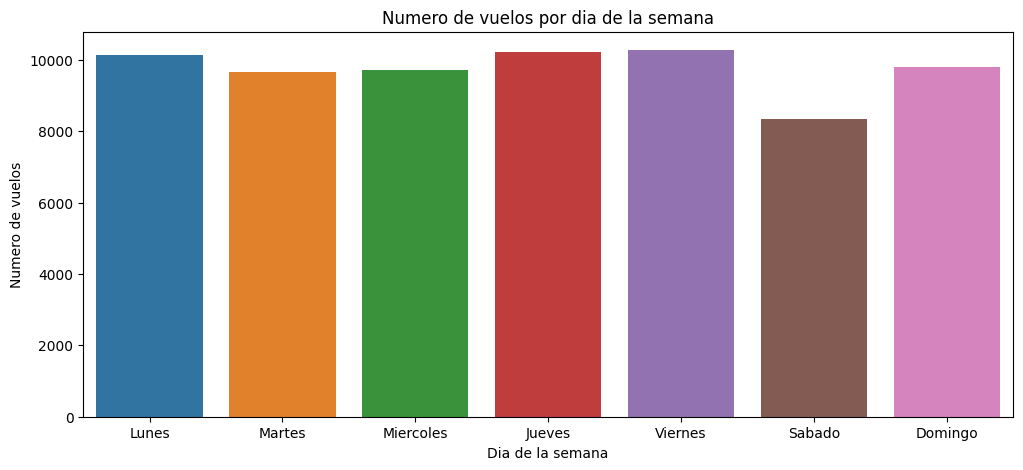

In [33]:
plt.figure(figsize = (12,5))
sns.barplot(x=days, y=values_days)
plt.title('Numero de vuelos por dia de la semana')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Dia de la semana', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [34]:
# Disminución de vuelos entre el viernes y el sabado
(values_days[4]-values_days[5])/values_days[4]

0.1874695982099426

### Distribución 'TIPOVUELO'

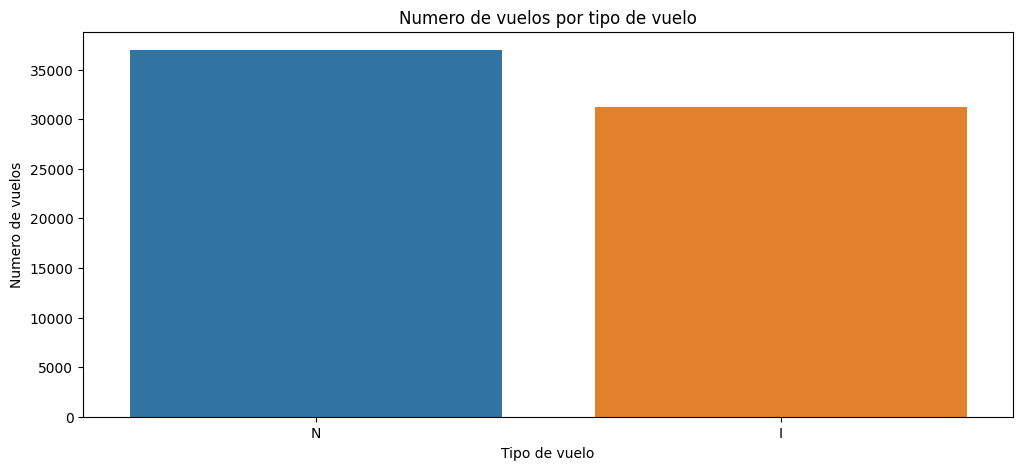

In [35]:
plt.figure(figsize = (12,5))
sns.barplot(x=type_flights.index, y=type_flights.values)
plt.title('Numero de vuelos por tipo de vuelo')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Tipo de vuelo', fontsize=10)
plt.show()

In [36]:
# Distribución porcentual entre los tipos de vuelos
print(type_flights[0]/type_flights.sum())
print(type_flights[1]/type_flights.sum())

0.5422858567928763
0.45771414320712367


### Distribución 'OPERA'

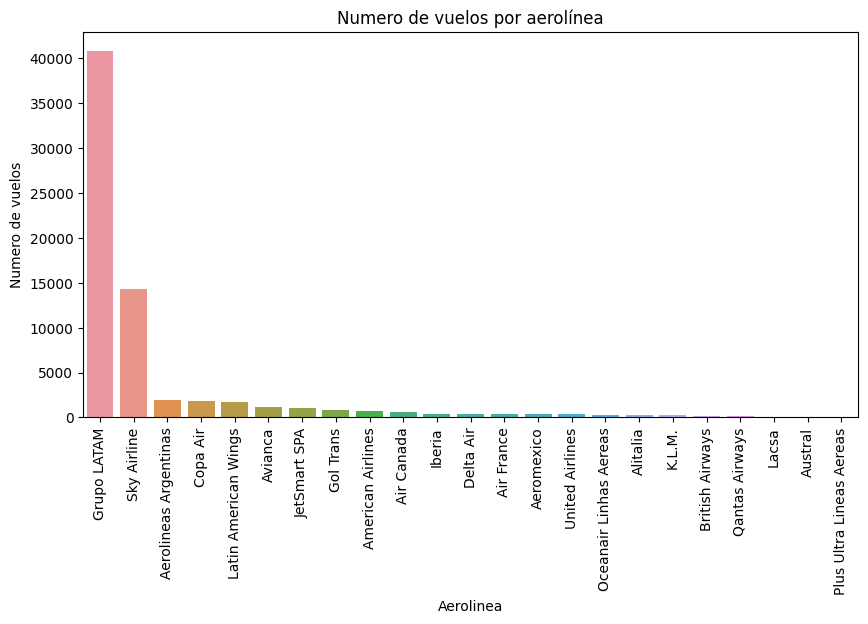

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(x=airline_flights.index, y=airline_flights.values)
plt.title('Numero de vuelos por aerolínea')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Aerolinea', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [38]:
# Distribución porcentual de las 10 primera aerolineas con mas numero de vuelos
airline_flights[0:12].sum()/airline_flights.sum()

0.964102865022665

### Distribución 'SIGLADES'

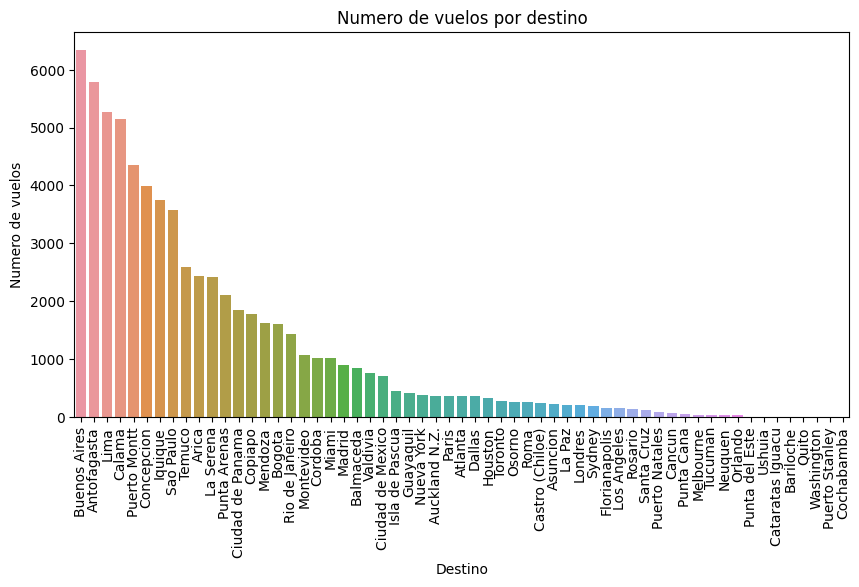

In [39]:
plt.figure(figsize = (10,5))
sns.barplot(x=destination_flights.index, y=destination_flights.values)
plt.title('Numero de vuelos por destino')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Destino', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [40]:
destination_flights[0:30].sum()/destination_flights.sum()

0.9485821585224522

## ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### Distribución 'DIA'
Todos los días del mes parecen tener una distribución similar de numero de vuelos. Los días 29, 30 y 31 tienen menos vuelos, pero esto es porque solo hay 11 meses con dia 29, 11 meses con dia 30 y solo 7 meses con dia 30. 2017 no es un año bisiesto.

De acuerdo a esta distribución, la variable 'DIA' podria ser **eliminada** para los modelos. No trae mucha información.

### Distribución 'MES'
Se puede ver claramente una reducción significativa de vuelos en los meses de mitad de año con los meses de fin de año.

Tanto es así que en junio hay una reducción del **21.5%** de vuelos con relación a diciembre.

Esto implica que 'MES' es una **variable importante** para el objetivo del desafio.

### Distribución 'DIANOM'

Entre el viernes (dia con más numero de vuelos) y el sabado (dia con menos numero de vuelos) hay una reducción de 18.7% en el numero de vuelos, convirtiendo esta variable en una **variable relevante** para los modelos.

### Distribución 'TIPOVUELO'

Los vuelos internacionales y nacionales están distribuidos como el 54% y 46%, respectivamente. Es una buena distribución porque es muy cercana al 50%, haciendo que los datos no estén desbalanceados.

### Distribución 'OPERA'

Esta es una variable muy desbalanceada, las 12 primeras aerolineas concentran el 96.5% del total de vuelos.

Por ser una variable tan desbalanceada, decido usar **solamente las 12 primeras aerolineas**, que serian:

['Grupo LATAM', 'Sky Airline', 'Aerolineas Argentinas', 'Copa Air', 'Latin American Wings', 'Avianca', 'JetSmart SPA', 'Gol Trans', 'American Airlines', 'Air Canada', 'Iberia', 'Delta Air']

### Distribución 'SIGLADES'

Esta es otra variable muy desbalanceada, los 30 primeros destinos concentran el 95% del total de vuelos.

Por ser una variable tan desbalanceada, decido usar **solamente los 30 primeros destinos**, que serian:

['Buenos Aires', 'Antofagasta', 'Lima', 'Calama', 'Puerto Montt', 'Concepcion', 'Iquique', 'Sao Paulo', 'Temuco', 'Arica', 'La Serena', 'Punta Arenas', 'Ciudad de Panama', 'Copiapo', 'Mendoza', 'Bogota', 'Rio de Janeiro', 'Montevideo', 'Cordoba', 'Miami', 'Madrid', 'Balmaceda', 'Valdivia', 'Ciudad de Mexico', 'Isla de Pascua', 'Guayaquil', 'Nueva York', 'Auckland N.Z.', 'Paris', 'Atlanta']

# PUNTO 2

Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* `temporada_alta`: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* `dif_min`: diferencia en minutos entre Fecha-O y Fecha-I.
* `atraso_15`: 1 si dif_min > 15, 0 si no.
* `periodo_dia`: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), con base a
Fecha-I.

In [186]:
# Funciones para definir las 4 columnas solicitadas

def temporada_alta(row):
    current_year = row['Fecha-I'].year
    one_initial = dt.datetime(current_year,12,15)
    one_final = dt.datetime(current_year,3,3)
    second_initial = dt.datetime(current_year,7,15)
    second_final = dt.datetime(current_year,7,31)
    third_initial = dt.datetime(current_year,9,11)
    third_final = dt.datetime(current_year,9,30)

    if ((one_initial <= row['Fecha-I'] <= one_final) or 
        (second_initial <= row['Fecha-I'] <= second_final) or 
        (third_initial <= row['Fecha-I'] <= third_final)
    ):
        return 1
    return 0


def dif_min(row):
    diff = (row['Fecha-O'] - row['Fecha-I']).total_seconds()/60
    return diff


def atraso_15(row):
    if (row['dif_min'] > 15):
        return 1
    return 0


def periodo_dia(row):
    one_initial = dt.time(5,0)
    one_final = dt.time(11,59)
    second_initial = dt.time(12,0)
    second_final = dt.time(18,59)
    if (one_initial <= row['Fecha-I'].time() <= one_final):
        return 'mañana'
    elif (second_initial <= row['Fecha-I'].time() <= second_final):
        return 'tarde'
    return 'noche'

In [42]:
# Aplicando las funciones a df_initial

df_initial['temporada_alta'] = df_initial.apply(temporada_alta, axis=1)
df_initial['dif_min'] = df_initial.apply(dif_min, axis=1)
df_initial['atraso_15'] = df_initial.apply(atraso_15, axis=1)
df_initial['periodo_dia'] = df_initial.apply(periodo_dia, axis=1)

In [43]:
# Revisando que las nuevas columnas tienen valores correctos

print(f'Valores de Temporada Alta = {df_initial.temporada_alta.unique()}')
print(f'Valores de Diferencia de Minutos = {df_initial.dif_min.unique()}')
print(f'Valores de Atraso mayor a 15 minutos = {df_initial.atraso_15.unique()}')
print(f'Valores de Periodo del Dia = {df_initial.periodo_dia.unique()}')

Valores de Temporada Alta = [0 1]
Valores de Diferencia de Minutos = [  3.   9.  -2.  34.  -5.  40.  69.  -9.  14.  -7.  -4. -11. -12.  15.
   2.   8.  52.   0.  26.  -3.  -1.   5.   1.  -6.   4. -10.  10.  20.
  11.  24.  25.  13.  62.  -8.  19.  60.  17.  67.  84.  63.  97.  90.
 130.  77.  32.  39.  48.   6.  28.  33.  22.  21.  27.  47.  55.  53.
 105.  72.  99. 147.  18.  16.   7.  12. 138. -13.  31.  88.  35.  30.
 -14.  42.  37.  87.  65.  38.  59.  23.  46.  51.  94.  68.  57.  58.
  50.  29.  41.  54.  64.  81.  96.  56. 126.  61.  44. 133. 159.  43.
  75. 115.  45.  74. 104.  36.  73. 106.  49.  95.  89.  70. 113. 107.
  83. 116. 129. 119.  98. 154. 135. 109. 132. 161. 151. 148.  66. 140.
  76. 122.  92.  78. 142. 128. 127. 123. 110. 100. 143.  79. 103.  93.
 160.  86. 101. 136.  91. 112. 117.  80. 114. 150. 152. 111.  82. 157.
 137. 155. 120. 125. 102. 108.  85. 145. 121. 153. 158.  71. 118. 131.
 139. 144. 134. 146. 124. 141. 156. 149.]
Valores de Atraso mayor a 15 minutos 

In [44]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68167 entries, 0 to 68166
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68167 non-null  datetime64[ns]
 1   Vlo-I           68167 non-null  object        
 2   Emp-I           68167 non-null  object        
 3   Fecha-O         68167 non-null  datetime64[ns]
 4   Vlo-O           68167 non-null  object        
 5   Emp-O           68167 non-null  object        
 6   DIA             68167 non-null  int32         
 7   MES             68167 non-null  int32         
 8   DIANOM          68167 non-null  object        
 9   TIPOVUELO       68167 non-null  object        
 10  OPERA           68167 non-null  object        
 11  SIGLADES        68167 non-null  object        
 12  temporada_alta  68167 non-null  int64         
 13  dif_min         68167 non-null  float64       
 14  atraso_15       68167 non-null  int64         
 15  pe

In [45]:
# Guardar resultados como 'synthetic_features.csv'
df_initial.to_csv('synthetic_features.csv')

## Variable de precipitación (lluvia) sobre el aeropuerto de Santiago (SCL)

Simplemente como usuario, creo que una de las variables más importantes que afecta el retraso de vuelos es el **clima**. Sin embargo, esa variable no está presente en estos datos.

Es por ello que traigo los datos historicos de precipitación para el aeropuerto de Santiago, tomados del [Climate Prediction Center](https://www.cpc.ncep.noaa.gov/) de la NOAA-[National Oceanic and Atmospheric Administration.](https://www.noaa.gov/)

[Acá](https://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/GAUGE_GLB/RT/) se encuentran los registros de precipitación diaria de todo el mundo desde 1979, con una resolucion aproximada de 25 kilometros.

Para descargar los archivos se usa la funcion **cpc_prcp** de la [libreria rnooa](https://cran.r-project.org/web/packages/rnoaa/rnoaa.pdf)(página 19 del pdf), del repositorio CRAN de R. Esta libreria permite bajar los archivos por fecha para todo el mundo. Yo dispongo de un archivo unificado con los datos de precipitación para Ámerica del Sur desde enero de 2011 hasta noviembre de 2021, por causa de mi trabajo actual. Usaré este archivo para obtener el historico de precipipitación del aeropuerto de Santiago en 2017.

Entiendo que el factor precipitación lluvia no es el unico que puede afectar la operación de un aeropuerto, pero usaré solo ese factor climatologico.

Según [Google Maps](https://goo.gl/maps/GMsRv4s6ipyMYo8T7), el **Aeropuerto de Santiago de Chile** se ubica, aproximadamente, en la latitud -33.4 y longitud -70.8.

Para usar los datos del Climate Prediction Center la **longitud** debe ser transformada para valores entre 0 y 360. Es por ello que la longitud usada será (-70.8 + 360) de 289.2.

Finalmente, se deben aproximar las coordenadas del aeropuerto a los puntos del Climate Prediction Center. Por eso, las coordenadas usadas para los datos de precipitación serán -31.5 para latitud y 289.0 para longitud.

Este no es el metodo estandar para calcular la precipitación en un aeropuerto o sobre cualquier area. Se requiere del contorno del area a analizar, para hacer luego un promedio de todos los puntos de precipitación dentro de ese contorno. Pero, usaré este medoto para el presente desafio.

In [157]:
# Importando los datos de precipitación en el Aeropuerto de Santiago.
# Convirtiendo el indice en datetime

df_prcp = pd.read_csv('SCL_precipitation.csv')
df_prcp['date'] = pd.to_datetime(df_prcp['date'])
df_prcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             365 non-null    datetime64[ns]
 1   latitude         365 non-null    float64       
 2   longitude        365 non-null    float64       
 3   precipitacao_mm  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


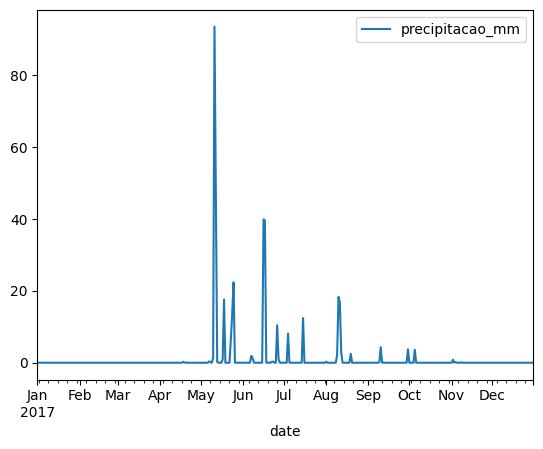

In [164]:
# Distribucion de la precipitacion en mm en 2017
df_prcp.plot(x='date', y='precipitacao_mm')
plt.show()

## Dataframe final para predicción de atrasos

"Data makes the difference, not the model"

### Limpieza y filtrado de variables para los modelos

Segun el **PUNTO 1** y la distribución de los datos, decidí eliminar y filtrar algunas de las variables de los datos iniciales para hacer que los modelos que van a ser usados "entiendan" mejor el problema.

Además, porque NO es el objetivo, de este desafio, desarrollar modelos que van a producción.

Los cambios que se harán son los siguientes:
* Eliminar columna 'DIA', no aporta información relevante. 
* Mantener columna 'MES, 'DIANOM' y 'TIPOVUELO'.
* Filtrar para solo las primeras 12 aerolineas que tienen más vuelos, columna 'OPERA'. Representan el 96.5% de los vuelos.
* Filtrar para solo los 30 destinos con más vuelos, columna 'SIGLADES'. Representa el 95% de los vuelos.

In [60]:
# Eliminar columna 'DIA'

df_final = df_initial.drop('DIA', axis=1)

In [61]:
# Filtrar para las primeras 12 aerolineas.

airline_filter = airline_flights[:12]
df_final = df_final[df_final.OPERA.isin(airline_filter.index)]

In [63]:
# Filtrar para los primeros 30 destinos.

destination_filter = destination_flights[:30]
df_final = df_final[df_final.SIGLADES.isin(destination_filter.index)]

In [68]:
# Quedaron 63.209 vuelos de los 68.167 originales

df_final.shape

(63209, 15)

### Variables importantes segun el análisis de datos

Como se mostró en "Concordancia de la información", el cambio de codigo de aerolinea y el cambio de codigo de vuelo entre los vuelos programados y operados, podrian ser importantes para la predicción de atrasos, esto porque, representan casi el 35% de los vuelos.

Por ello, decido incluir dos columnas:
* 'cambio_Emp', con valores 0 o 1. Donde 1 son los vuelos donde hubo cambio de codigo de aerolinea entre 'Emp-I' y 'Emp-O'.
* 'cambio_Vlo', con valores 0 o 1. Donde 1 son los vuelos donde hubo cambio de codigo del vuelo entre 'Vlo-I' y 'Vlo-O'.

In [71]:
# Funciones para crear las columnas 'cambio_Emp' y 'cambio_Vlo'

def cambio_emp(row):
    if (row['Emp-I'] != row['Emp-O']):
        return 1
    return 0


def cambio_vlo(row):
    if (row['Vlo-I'] != row['Vlo-O']):
        return 1
    return 0

In [73]:
# Aplicando funciones

df_final['cambio_Emp'] = df_final.apply(cambio_emp, axis=1)
df_final['cambio_Vlo'] = df_final.apply(cambio_vlo, axis=1)

In [75]:
# Comprobando valores

df_final['cambio_Emp'].value_counts()

0    44967
1    18242
Name: cambio_Emp, dtype: int64

### Merge con los datos de precipitación

A continuación se hará merge los datos de precipitación con el DataFrame final.

Para ello, crearé una columna 'date' con unicamente las fechas (sin horas) de 'Fecha_I', para luego colocar allí los datos de precipitation_mm de df_prcp.

In [180]:
df_final['date'] = df_final['Fecha-I'].dt.date
df_final['date'] = pd.to_datetime(df_final['date'])

In [168]:
# Eliminar columnas que no son necesarias en df_prcp

df_prcp.drop(['latitude', 'longitude'], axis=1, inplace=True)
df_prcp

,date,precipitacao_mm
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,0.0
...,...,...
360,2017-12-27,0.0
361,2017-12-28,0.0
362,2017-12-29,0.0
363,2017-12-30,0.0


In [182]:
# Merge df_final y df_prcp por date

df_merge = pd.merge(df_final, df_prcp, on='date')
df_merge

,Fecha-I,Vlo-I,Emp-I,Fecha-O,Vlo-O,Emp-O,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,cambio_Emp,cambio_Vlo,date,precipitacao_mm
0,2017-01-01 23:30:00,226,AAL,2017-01-01 23:33:00,226,AAL,1,Domingo,I,American Airlines,Miami,0,3.0,0,noche,0,0,2017-01-01,0.0
1,2017-01-01 22:00:00,912,AAL,2017-01-01 22:15:00,912,AAL,1,Domingo,I,American Airlines,Miami,0,15.0,0,noche,0,0,2017-01-01,0.0
2,2017-01-01 13:35:00,92,ACA,2017-01-01 13:54:00,92,ACA,1,Domingo,I,Air Canada,Buenos Aires,0,19.0,1,tarde,0,0,2017-01-01,0.0
3,2017-01-01 10:35:00,1281,ARG,2017-01-01 10:25:00,1281,ARG,1,Domingo,I,Aerolineas Argentinas,Buenos Aires,0,-10.0,0,mañana,0,0,2017-01-01,0.0
4,2017-01-01 16:45:00,1285,ARG,2017-01-01 16:38:00,1285,ARG,1,Domingo,I,Aerolineas Argentinas,Buenos Aires,0,-7.0,0,tarde,0,0,2017-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63204,2017-12-26 07:00:00,203,JAT,2017-12-26 07:01:00,3,JAT,12,Martes,N,JetSmart SPA,Concepcion,0,1.0,0,mañana,0,1,2017-12-26,0.0
63205,2017-12-26 10:37:00,251,JAT,2017-12-26 10:39:00,251,JAT,12,Martes,N,JetSmart SPA,Puerto Montt,0,2.0,0,mañana,0,0,2017-12-26,0.0
63206,2017-12-26 18:51:00,255,JAT,2017-12-26 19:11:00,255,JAT,12,Martes,N,JetSmart SPA,Puerto Montt,0,20.0,1,tarde,0,0,2017-12-26,0.0
63207,2017-12-26 14:23:00,281,JAT,2017-12-26 14:29:00,281,JAT,12,Martes,N,JetSmart SPA,Temuco,0,6.0,0,tarde,0,0,2017-12-26,0.0


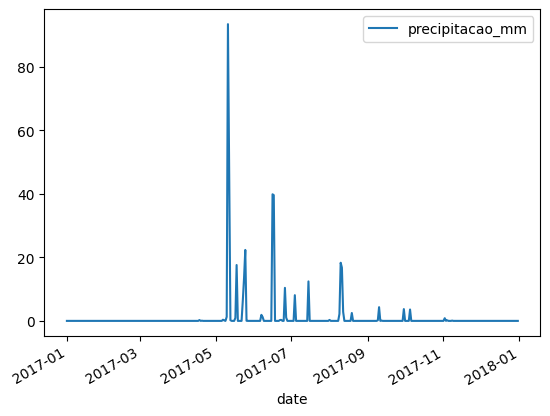

In [183]:
# Distribucion de la precipitacion en mm en 2017 en los datos finales
df_merge.plot(x='date', y='precipitacao_mm')
plt.show()

# PUNTO 3

## ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

### Variables para graficos de tasa de atraso

In [226]:
destination_delays = (df_merge.groupby(['SIGLADES'])['atraso_15'].sum()*100/df_merge['SIGLADES'].count()).sort_values(ascending=False)
airline_delays = (df_merge.groupby(['OPERA'])['atraso_15'].sum()*100/df_merge['OPERA'].count()).sort_values(ascending=False)
month_delays = (df_merge.groupby(['MES'])['atraso_15'].sum()*100/df_merge['MES'].count()).sort_values(ascending=False)
weekday_delays = (df_merge.groupby(['DIANOM'])['atraso_15'].sum()*100/df_merge['DIANOM'].count()).sort_values(ascending=False)
days_delays = [weekday_delays.index[1], weekday_delays.index[4],
               weekday_delays.index[3], weekday_delays.index[2],
               weekday_delays.index[0], weekday_delays.index[6],
               weekday_delays.index[5]
]
values_days_delays = [weekday_delays.values[1], weekday_delays.values[4],
                      weekday_delays.values[3], weekday_delays.values[2],
                      weekday_delays.values[0], weekday_delays.values[6],
                      weekday_delays.values[5]
]
season_delays = (df_merge.groupby(['temporada_alta'])['atraso_15'].sum()*100/df_merge['temporada_alta'].count()).sort_values(ascending=False)
season_values = df_merge['temporada_alta'].value_counts()
type_delays = (df_merge.groupby(['TIPOVUELO'])['atraso_15'].sum()*100/df_merge['TIPOVUELO'].count()).sort_values(ascending=False)

### Por destino

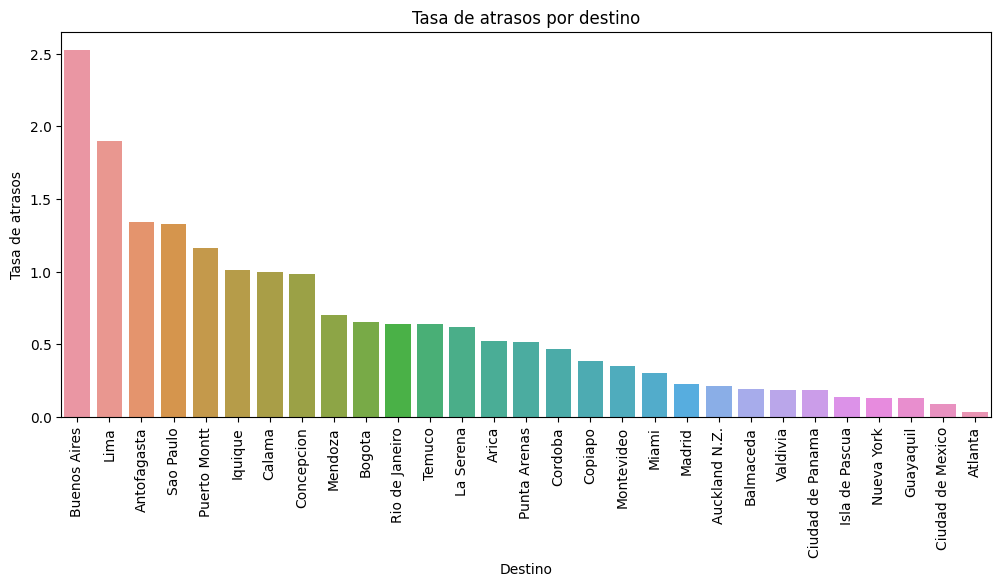

In [197]:
plt.figure(figsize = (12,5))
sns.barplot(x=destination_delays.index, y=destination_delays.values)
plt.title('Tasa de atrasos por destino')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Destino', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Las tres ciudades con mayor numero vuelos, presentan las mayores tasas de atrasos. Pero, a partir de la cuarta ciudad hay cosas interesantes, São Paulo es la octava ciudad con mas destinos, pero tiene la cuarta tasa de atrasos. Podría decirse que hay una fuerte influencia del destino sobre los atrasos.

### Por aerolinea

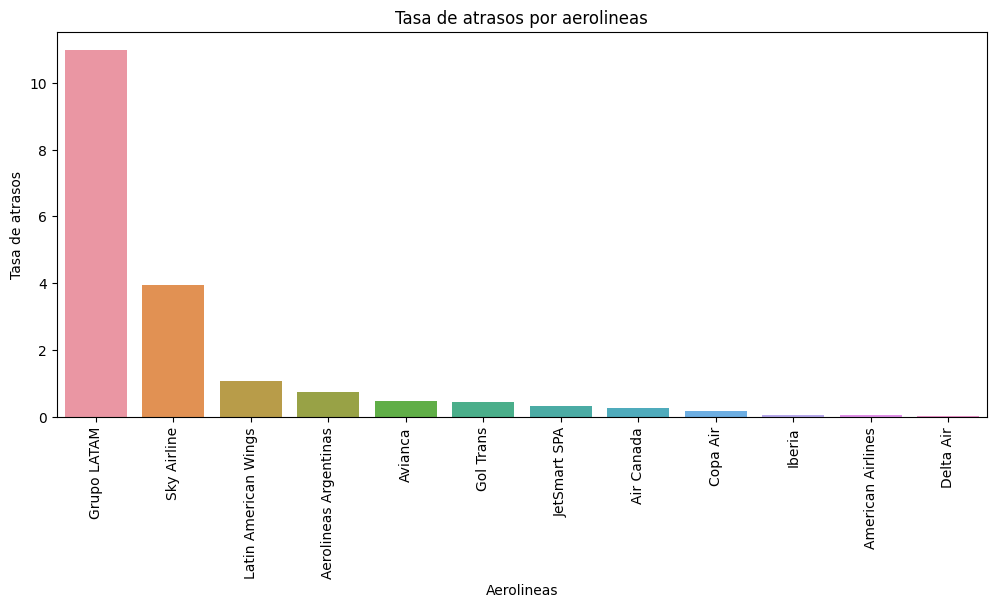

In [199]:
plt.figure(figsize = (12,5))
sns.barplot(x=airline_delays.index, y=airline_delays.values)
plt.title('Tasa de atrasos por aerolineas')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Aerolineas', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Las aerolineas con más vuelos y las que presentan mayor tasa de atrasos, no presentan mucha diferencia. Resalto, solamente los valores de Copa Air que es la cuarta aerolinea con mayor cantidad de vuelos, pero solo novena en tasa de atrasos, indicando que esta aerolinea tiene pocos atrasos.

### Por mes del año

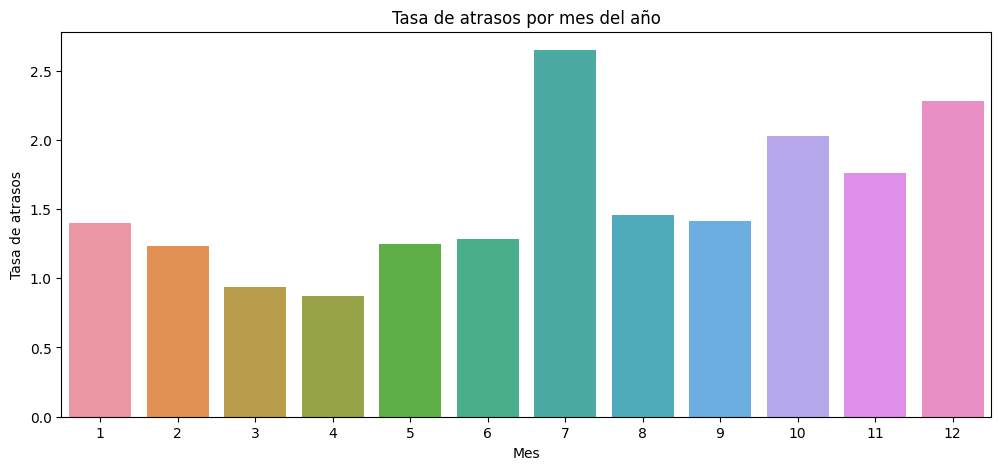

In [201]:
plt.figure(figsize = (12,5))
sns.barplot(x=month_delays.index, y=month_delays.values)
plt.title('Tasa de atrasos por mes del año')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Mes', fontsize=10)
plt.xticks(rotation=0)
plt.show()

La distribución de la tasa de atrasos por meses del año es interesante. Los meses con mayor numero de vuelos fueron julio y dicimbre, pero se ve como la tasa de atrasos entre julio y diciembre es muy diferente. Podría suponer que la preparación y cantidad de personal de aerolineas, aeropuerto y otros podría ser mayor en dicimebre que en julio. Pero, definitivamente es una variable importante para el modelo. 

### Por dia de la semana

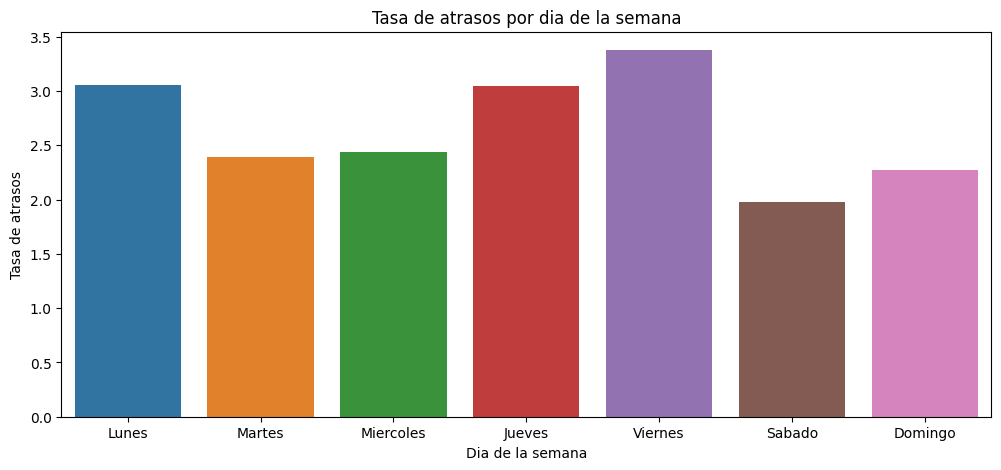

In [215]:
plt.figure(figsize = (12,5))
sns.barplot(x=days_delays, y=values_days_delays)
plt.title('Tasa de atrasos por dia de la semana')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Dia de la semana', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [216]:
# Disminución de vuelos entre el viernes y el sabado
(values_days_delays[4]-values_days_delays[5])/values_days_delays[4]

0.41545667447306794

En general, el comportamiento de vuelos y tasa de atraso por dia de la semana es bastante similar. Llama la atención que la disminución de vuelos de viernes a sabado (18%) es menor que la disminucion de la tasa de atrasos (41%), es decir, a pesar que el sabado hay 18% menos vuelos que el viernes, la tasa de atrasos es 41% menor. Los atrasos son mucho menos los dias sabados.

### Por temporada

#### Primero vuelos por temporada

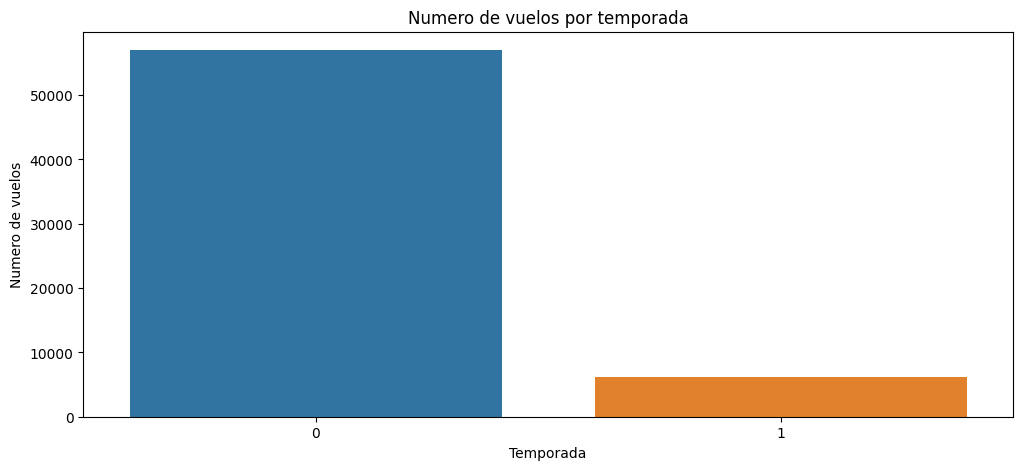

In [221]:
plt.figure(figsize = (12,5))
sns.barplot(x=season_values.index, y=season_values.values)
plt.title('Numero de vuelos por temporada')
plt.ylabel('Numero de vuelos', fontsize=10)
plt.xlabel('Temporada', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [223]:
season_values[1]/season_values[0]

0.10859918971534806

#### Tasa de atraso por temporada

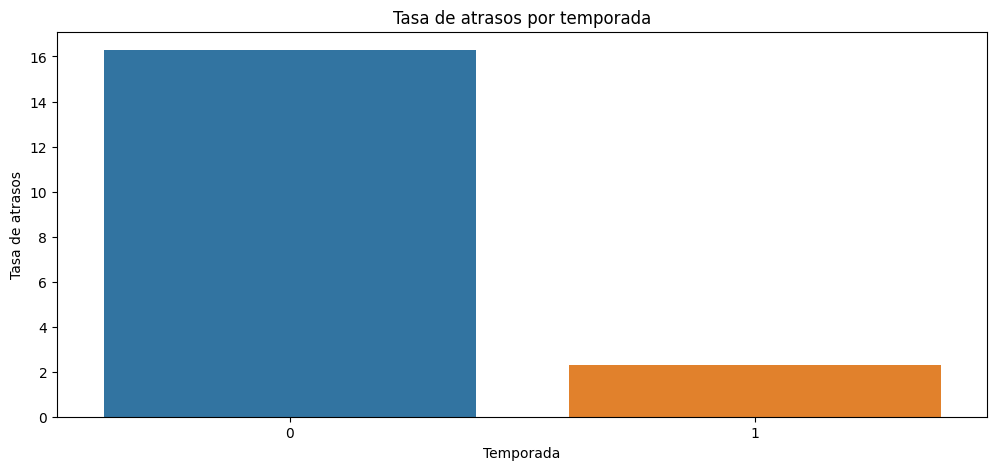

In [218]:
plt.figure(figsize = (12,5))
sns.barplot(x=season_delays.index, y=season_delays.values)
plt.title('Tasa de atrasos por temporada')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Temporada', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [224]:
season_delays[1]/season_delays[0]

0.13988731299786283

El numero de vuelos en temporada alta (1) es el 10% de los vuelos de temporada baja (0). Ahora bien, la tasa de atraso en temporada alta es el 13% de la tasa en temporada baja, un resultado similar e indicaria que esta variable no es tan relevante como se pensaria.

### Por tipo de vuelo

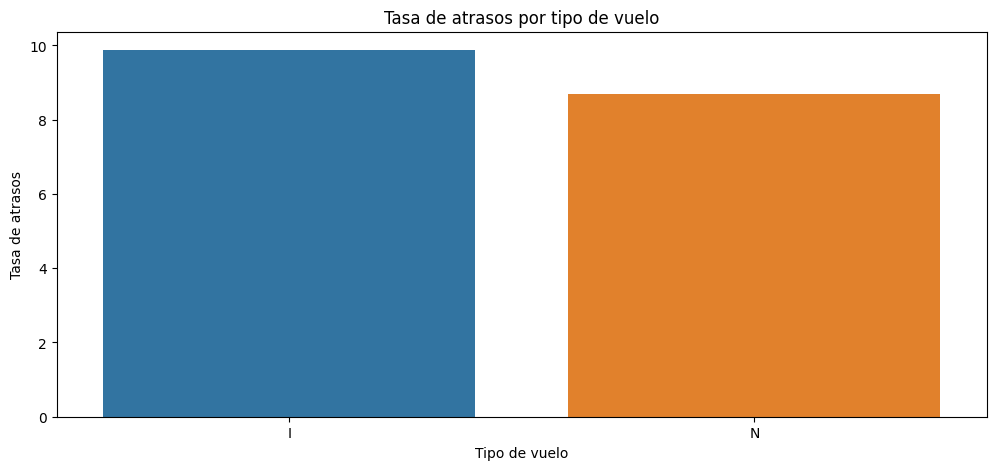

In [227]:
plt.figure(figsize = (12,5))
sns.barplot(x=type_delays.index, y=type_delays.values)
plt.title('Tasa de atrasos por tipo de vuelo')
plt.ylabel('Tasa de atrasos', fontsize=10)
plt.xlabel('Tipo de vuelo', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [228]:
# Distribución porcentual entre los tipos de vuelos por tasa de atraso
print(type_delays[0]/type_delays.sum())
print(type_delays[1]/type_delays.sum())

0.5320436338844384
0.46795636611556163


La distribucion de numero de vuelos y tasa de atraso por tipo de vuelo es bastante similar. Esto indicaria que esta variable no seria muy relevante para los modelos.

## ¿Qué variables esperarías que más influyeran en predecir atrasos?

Según el analisis previo, espero que las variables de destino, aerolinea, mes y dia de la semana fuera los que mas influyeran en predecir atrasos. 

Del mismo modo, con los analisis previos de los datos, también espero que las variables cambio_Emp, cambio_Vlo y precipitacao_mm sean bastante relevantes para predecir atrasos.

# PUNTO 4
## Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

## Comentarios
* Las variables adicionales y variables externas ya fueron incluidas en los datos.
* Los siguientes serán los features para los modelos:
['MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'cambio_Emp', 'cambio_Vlo', 'precipitacao_mm']
* El target será la columna ['atraso_15']
* Para predecir el atraso se hará uso de modelos clasificatorios de ML supervisados, especificamente aquellos que tienen buen comportamiento en clasificación binaria.
    1. Al tratarse de modelos de clasificacion y usando variables categoricas, se hara un proceso de *Encoding* para pasarlas a vairables numericas.
    2. 

## Encoding


In [ ]:
# Adversarial Validation
# roc_auc_score




: 

: 

: 

: 

: 

In [184]:
df_merge.to_pickle('df_9.pkl')

SI HAY TIEMPO REENTRENAR CON TODOS LOS DATOS.

Interesante los vuelos que salieron antes de tiempo